<a href="https://colab.research.google.com/github/tnaka78/machine_learning_handson/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習ハンズオン（線形回帰編）

## 事前準備（ライブラリのロード）

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## 1パラメータの線形回帰

【課題】賃貸アパートの家賃を予測してみましょう。徒歩10分では家賃はいくらでしょうか？

| 駅からの時間（分） | 家賃（万円）|
| ---: | ---: |
| 1 | 8.02 |
| 2 | 7.75 |
| 3 | 7.63 |
| 4 | 7.47 |
| 5 | 7.09 |
| 6 | 7.01 |
| 7 | 6.75 |
| 8 | 6.65 |
| 9 | 6.39 |
|**10** | **????**|


### データの作成

まず、numpyでデータを作ります。

In [0]:
xs = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0], dtype=np.float)
ys = np.array([8.02, 7.75, 7.63, 7.47, 7.09, 7.01, 6.75, 6.65, 6.39], dtype=np.float)

これを散布図にしてみましょう。赤い点線のような関係が見えてくるかと思います。

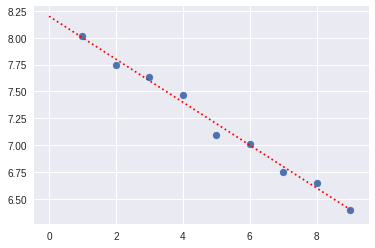

In [3]:
%matplotlib inline
plt.plot([0.0, 9.0], [8.2, 6.4], color='r', ls=':')
plt.scatter(xs, ys)

### モデルの作成

次に、Kerasの学習モデルを作ります。ここではモデルを作っているだけで、まだ学習は行われません。

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_dim=1)
])
model.compile(optimizer='sgd', loss='mean_squared_error')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


ここでは次のことを行っています。
 * 1個の値（駅からの時間）を入力として受け取り、全結合層(Dense)を通して、1個の値（家賃）を出力する。
 * 学習は確率的勾配降下法によって行い、学習率は0.01（KerasでSGDを使う際の既定値）とする。
 * 損失は平均二乗誤差$L= \frac{1}{m} \sum^m_{i=1}{(\hat{y}_i-y_i)^2}$を採用する（$m$はデータの個数、$\hat{y}$は予測値、$y$は正解）。

作ったモデルを見てみましょう。

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### モデルの学習

モデルに実データを渡して学習します。

ここでは、同じデータを1000回学習させます。学習が進むにつれて損失が減っていくのがわかります。

In [6]:
hist = model.fit(xs, ys, epochs=1000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
9/9 [==============================] - 2s 268ms/sample - loss: 14.9849
Epoch 2/1000
9/9 [==============================] - 0s 531us/sample - loss: 14.0638
Epoch 3/1000
9/9 [==============================] - 0s 567us/sample - loss: 13.8503
Epoch 4/1000
9/9 [==============================] - 0s 476us/sample - loss: 13.7247
Epoch 5/1000
9/9 [==============================] - 0s 268us/sample - loss: 13.6107
Epoch 6/1000
9/9 [==============================] - 0s 495us/sample - loss: 13.4990
Epoch 7/1000
9/9 [==============================] - 0s 691us/sample - loss: 13.3883
Epoch 8/1000
9/9 [==============================] - 0s 391us/sample - loss: 13.2786
Epoch 9/1000
9/9 [==============================] - 0s 787us/sample - loss: 13.1698
Epoch 10/1000
9/9 [==============================] - 0s 432us/sample - loss: 13.0618
Epoch 11/1000
9/9 [==============================] - 0s 451us/sample - loss: 12.9548
Epoch 12/1000
9/9 [=======

学習回数と損失の関係をグラフに表してみましょう。

Text(0, 0.5, 'loss')

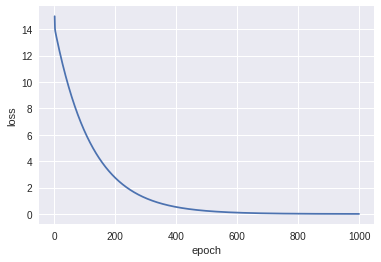

In [7]:
%matplotlib inline
plt.plot(range(1, 1001), hist.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")

学習した重みとバイアスを見てみましょう。

重みが-0.2、バイアスが8.2に近い値になっていれば、学習がうまくいっていることになります。

In [8]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]
print("weight = {}".format(weights[0, 0]))
print("bias = {}".format(biases[0]))

weight = -0.17948196828365326
bias = 8.06558895111084


### 予測の実行

いよいよ、徒歩10分の家賃を予測してみましょう。

データが9個しかないので、出てきた予測値は、期待よりも正確でないと感じるかもしれません。

In [9]:
model.predict([10.0])

array([[6.270769]], dtype=float32)

## 複数パラメータの線形回帰

引き続き、賃貸アパートの家賃を予測してみましょう。徒歩10分で2階以上の部屋の家賃はいくらでしょうか？

| 駅からの時間（分） | 2階以上? | 家賃（万円）|
| ---: | --- | ---: |
| 1 | Y | 8.11 |
| 1 | N | 8.02 |
| 2 | Y | 7.91 |
| 2 | N | 7.75 |
| 3 | Y | 7.70 |
| 3 | N | 7.63 |
| 4 | Y | 7.55 |
| 4 | N | 7.47 |
| 5 | Y | 7.32 |
| 5 | N | 7.09 |
| 6 | Y | 7.08 |
| 6 | N | 7.01 |
| 7 | Y | 6.98 |
| 7 | N | 6.75 |
| 8 | Y | 6.83 |
| 8 | N | 6.65 |
| 9 | Y | 6.47 |
| 9 | N | 6.39 |
|**10** | **Y** | **????**|


### データの作成

numpyでデータを作ります。

データは数値にしなければならないため、2階以上かどうかは、Yなら1、Nなら0の数値に変換しておきます。

In [0]:
xs = np.array([[1.0, 1.0],
               [1.0, 0.0], 
               [2.0, 1.0], 
               [2.0, 0.0],
               [3.0, 1.0],
               [3.0, 0.0],
               [4.0, 1.0],
               [4.0, 0.0],
               [5.0, 1.0],
               [5.0, 0.0],
               [6.0, 1.0],
               [6.0, 0.0],
               [7.0, 1.0],
               [7.0, 0.0],
               [8.0, 1.0],
               [8.0, 0.0],
               [9.0, 1.0],
               [9.0, 0.0]], dtype=np.float)
ys = np.array([8.11,
               8.02,
               7.91,
               7.75,
               7.70,
               7.63,
               7.55,
               7.47,
               7.32,
               7.09,
               7.08,
               7.01,
               6.98,
               6.75,
               6.83,
               6.65,
               6.47,
               6.39], dtype=np.float)

### モデルの作成

先ほどと同様に学習モデルを作ります。先ほどとの違いは、パラメータが2個（駅からの時間と2階以上かどうか）あるので、`Dense`の`input_dim`引数の値が2になっています。

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_dim=2)
])
model.compile(optimizer='sgd', loss='mean_squared_error')

作ったモデルを見てみます。入力パラメータが1個増えた分、学習パラメータも増えています。

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


### モデルの学習

先ほど同様、データを1000回学習させ、損失をグラフ化します。

In [13]:
hist = model.fit(xs, ys, epochs=1000)

Epoch 1/1000
18/18 [==============================] - 0s 6ms/sample - loss: 108.6017
Epoch 2/1000
18/18 [==============================] - 0s 465us/sample - loss: 27.0016
Epoch 3/1000
18/18 [==============================] - 0s 546us/sample - loss: 17.0288
Epoch 4/1000
18/18 [==============================] - 0s 234us/sample - loss: 15.6697
Epoch 5/1000
18/18 [==============================] - 0s 308us/sample - loss: 15.3483
Epoch 6/1000
18/18 [==============================] - 0s 247us/sample - loss: 15.1537
Epoch 7/1000
18/18 [==============================] - 0s 318us/sample - loss: 14.9764
Epoch 8/1000
18/18 [==============================] - 0s 279us/sample - loss: 14.8032
Epoch 9/1000
18/18 [==============================] - 0s 145us/sample - loss: 14.6325
Epoch 10/1000
18/18 [==============================] - 0s 280us/sample - loss: 14.4640
Epoch 11/1000
18/18 [==============================] - 0s 237us/sample - loss: 14.2977
Epoch 12/1000
18/18 [==============================] 

Text(0, 0.5, 'loss')

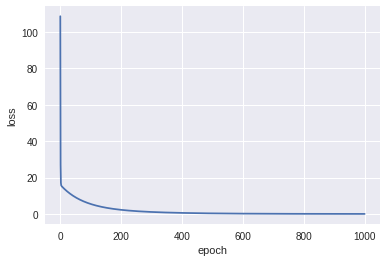

In [14]:
%matplotlib inline
plt.plot(range(1, 1001), hist.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")

重みとバイアスを出力します。重みが(-0.2, +0.1)、バイアスが8.2に近い値になっていれば、学習がうまくいっていることになります。

In [15]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]
print("weight = {}".format(weights))
print("bias = {}".format(biases))

weight = [[-0.16477078]
 [ 0.3233327 ]]
bias = [7.8806167]


### 予測の実行

最後に、徒歩10分で2階以上の物件の家賃を予測してみましょう。

In [16]:
x_test = np.array([[10.0, 1.0]])
model.predict(x_test)

array([[6.5562415]], dtype=float32)